In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


training_dir = r'C:\Users\Prajjawal Mishra\Downloads\input\chest_xray\train'
test_dir = r'C:\Users\Prajjawal Mishra\Downloads\input\chest_xray\test'
valid_dir = r'C:\Users\Prajjawal Mishra\Downloads\input\chest_xray\val'


training_generator = ImageDataGenerator(rescale=1/255)
data_train = training_generator.flow_from_directory(
    training_dir, 
    target_size=(120,120),
    batch_size=8, 
    class_mode='binary')

test_generator = ImageDataGenerator(rescale=1/255)
data_test = test_generator.flow_from_directory(
    test_dir, 
    target_size=(120,120),
    batch_size=8, 
    class_mode='binary')

validation_generator = ImageDataGenerator(rescale=1/255)
data_valid = validation_generator.flow_from_directory(
    valid_dir,
    target_size=(120,120),
    batch_size=8,
    class_mode='binary')


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(120,120,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc'])

In [5]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(data_train, epochs=10, validation_data=data_valid, callbacks=[early_stop])

Epoch 1/10
652/652 [==============================] - 83s 125ms/step - loss: 0.4497 - acc: 0.8079 - val_loss: 0.5936 - val_acc: 0.6250
Epoch 2/10
652/652 [==============================] - 83s 127ms/step - loss: 0.2042 - acc: 0.9116 - val_loss: 0.3847 - val_acc: 0.8125
Epoch 3/10
652/652 [==============================] - 91s 140ms/step - loss: 0.1362 - acc: 0.9477 - val_loss: 0.1270 - val_acc: 0.9375
Epoch 4/10
652/652 [==============================] - 96s 147ms/step - loss: 0.1157 - acc: 0.9551 - val_loss: 0.5458 - val_acc: 0.7500
Epoch 5/10
652/652 [==============================] - 94s 144ms/step - loss: 0.0859 - acc: 0.9684 - val_loss: 0.4872 - val_acc: 0.8750
Epoch 6/10
652/652 [==============================] - 94s 143ms/step - loss: 0.0679 - acc: 0.9755 - val_loss: 1.1534 - val_acc: 0.6875


In [6]:
model.evaluate(data_test)

78/78 [==============================] - 11s 138ms/step - loss: 1.3833 - acc: 0.7628


[1.3832825422286987, 0.7628205418586731]

In [7]:
predictions=model.predict(data_test)

78/78 [==============================] - 9s 116ms/step


In [18]:
predictions



array([[9.99992013e-01],
       [9.99957383e-01],
       [9.99491870e-01],
       [9.99999702e-01],
       [9.94451106e-01],
       [2.65762717e-01],
       [9.98306155e-01],
       [9.99996364e-01],
       [8.83472860e-01],
       [9.99943018e-01],
       [9.98309851e-01],
       [5.29376119e-02],
       [9.72217560e-01],
       [9.99850333e-01],
       [5.47089398e-01],
       [1.00000000e+00],
       [6.66132390e-01],
       [9.99998152e-01],
       [9.92922127e-01],
       [9.99999881e-01],
       [9.99923468e-01],
       [9.99407649e-01],
       [9.93508160e-01],
       [9.99974191e-01],
       [9.99992430e-01],
       [9.99998927e-01],
       [9.99879837e-01],
       [9.99720812e-01],
       [9.20749426e-01],
       [7.70194232e-01],
       [9.99919474e-01],
       [7.46170640e-01],
       [9.99999940e-01],
       [9.97310221e-01],
       [9.99999821e-01],
       [7.10721731e-01],
       [9.99911427e-01],
       [9.99995768e-01],
       [9.99803364e-01],
       [9.99988914e-01],


1/1 [==============================] - 0s 205ms/step


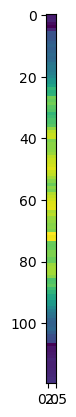

The probability of pneumonia is : [0.9999983]


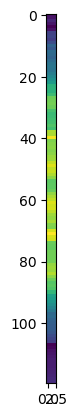

The probability of pneumonia is : [0.99975306]


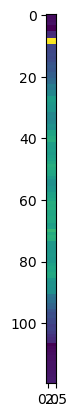

The probability of pneumonia is : [0.99993426]


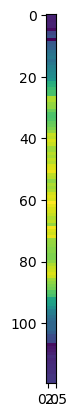

The probability of pneumonia is : [0.9995038]


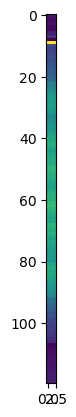

The probability of pneumonia is : [0.99999714]


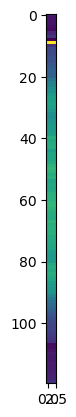

The probability of pneumonia is : [0.9938119]


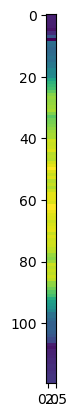

The probability of pneumonia is : [0.99999994]


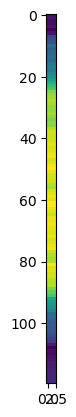

The probability of pneumonia is : [0.9934367]


In [19]:
x, y = data_test.next()
predictions = model.predict(x)

for i in range(0,1):
    image = x[i]
    for j in range(0,8):
        plt.imshow(image[j])
        plt.show()
        print("The probability of pneumonia is :", predictions[j])


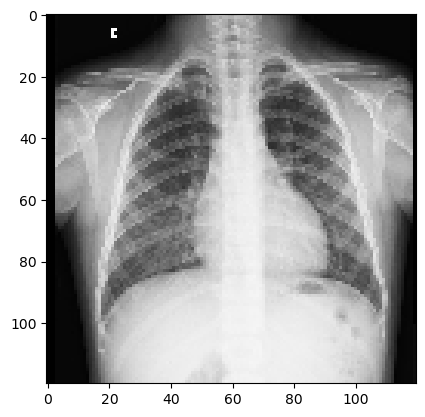

the probability of pneumonia is : [0.9999983]


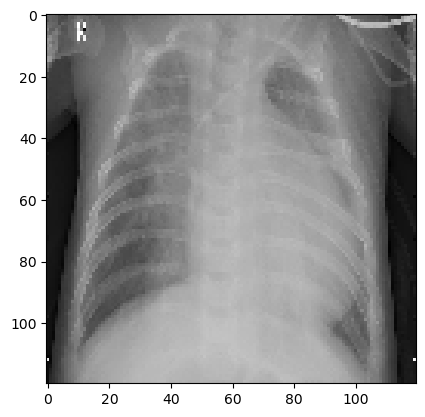

the probability of pneumonia is : [0.99975306]


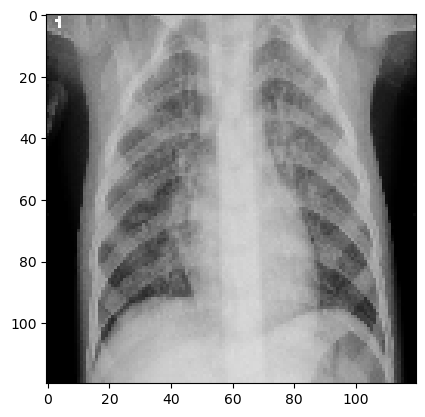

the probability of pneumonia is : [0.99993426]


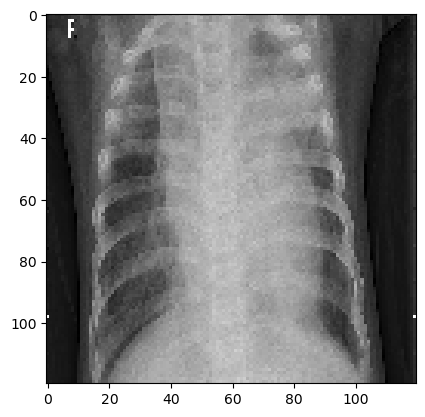

the probability of pneumonia is : [0.9995038]


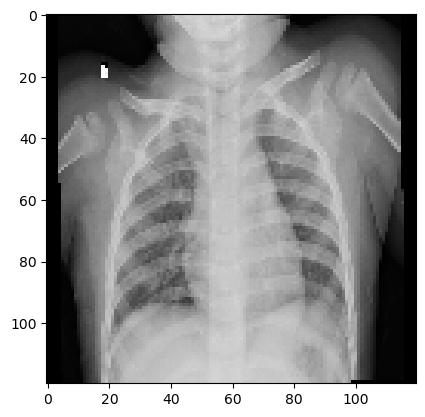

the probability of pneumonia is : [0.99999714]


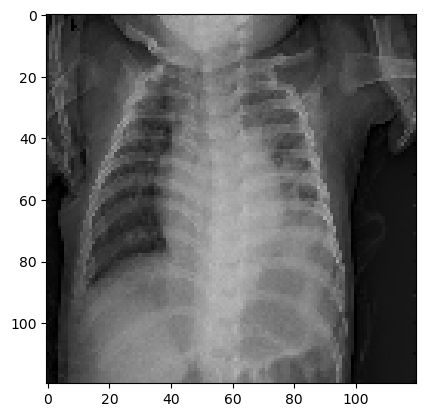

the probability of pneumonia is : [0.9938119]


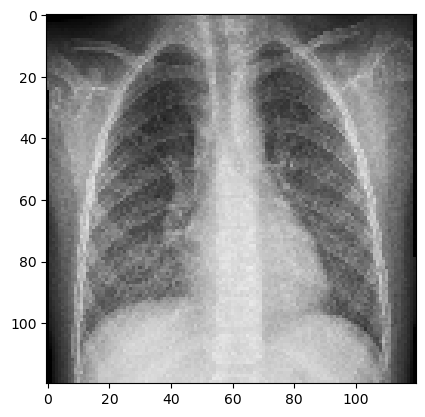

the probability of pneumonia is : [0.99999994]


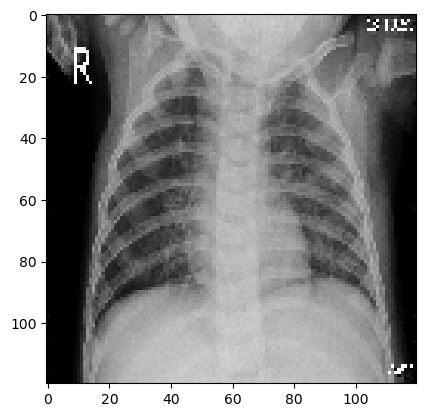

the probability of pneumonia is : [0.9934367]


In [20]:
x=data_test.next()
for i in range(0,1):
    image=x[i]
    for j in range(0,8):
        plt.imshow(image[j])
        plt.show()
        print("the probability of pneumonia is :",predictions[j])

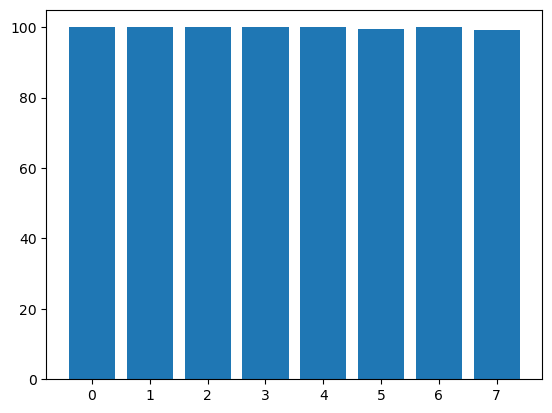

In [21]:
import matplotlib.pyplot as plt

predictions_percent = predictions.flatten() * 100
x = range(len(predictions_percent))

plt.bar(x, predictions_percent)

plt.show()


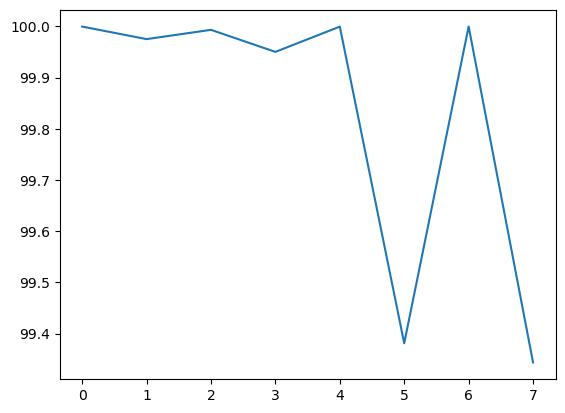

In [22]:
import matplotlib.pyplot as plt


predictions_percent = predictions.flatten() * 100


x = range(len(predictions_percent))


plt.plot(x, predictions_percent)


plt.show()


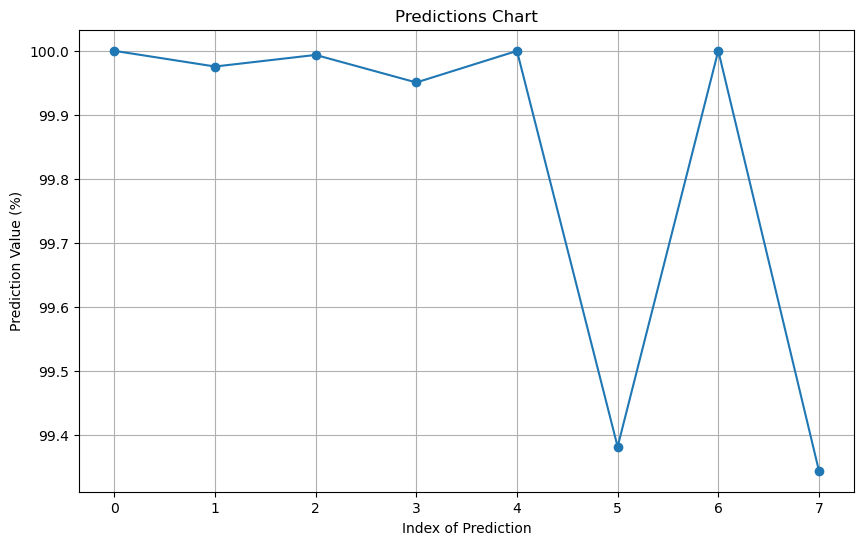

In [23]:
import matplotlib.pyplot as plt


predictions_percent = predictions.flatten() * 100


x = range(len(predictions_percent))


plt.figure(figsize=(10,6))  
plt.plot(x, predictions_percent, marker='o', linestyle='-')  


plt.xlabel('Index of Prediction')
plt.ylabel('Prediction Value (%)')
plt.title('Predictions Chart')


plt.grid(True)

plt.show()
